# Probabilistic Methods and Monte-Carlo Simulation

**Fall 2025 Quantiative Methods in Finance**

**The Erdös Institute**

In [4]:
import numpy as np  # 导入数值计算库
import sys  # 访问解释器与系统相关信息
print(sys.executable)  # 输出当前 Python 解释器路径，便于确认所用环境
!"{sys.executable}" -m pip install --upgrade pip  # 在当前解释器环境中升级 pip（注意：每次运行都会执行安装）
!"{sys.executable}" -m pip install numpy pandas matplotlib seaborn  # 安装所需依赖库（若已安装可注释）

import pandas as pd  # 数据分析库
import seaborn as sns  # 统计绘图库
import matplotlib.pyplot as plt  # 基础绘图接口
import seaborn as sns  # 重复导入（无功能影响，可保留以保持原貌）

sns.set_style('darkgrid')  # 设定 seaborn 绘图风格为深色网格

/usr/local/bin/python3


**The Central Limit Theorem** Let $X_1, X_2, \ldots, X_n, \ldots$ be a sequence of independent and identically distributed random variables with finite mean $\mu$ and standard deviation $\sigma$. Let

$$Y_n=\frac{X_1+X_2+\cdots +X_n - n\mu}{\sqrt{n}\sigma}.$$

Then

$$\lim_{n\to \infty}Y_n = \mathcal{N}(0,1).$$

Equivalently, if $F_n(x)=\mathbb{P}(Y_n\leq x)$ is cummulative distribution function of $Y_n$, then there is point-wise convergence of functions

$$\lim_{n\to \infty}F_n(x) = \Phi(x)$$

Where $\Phi$ is cummulative distribution function of $\mathcal{N}(0,1)$, i.e.,

$$\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^xe^{-\frac{y^2}{2}}\, dy.$$



**Remark** 
If $\mathbb{E}[|X_1|^3]<\infty$, then convergence of the cummulative distribution function of $Y_n$ to $\Phi$ is uniform.







**Implication in Modeling and Probabilistic Methods**

The central limit theorem informs of two pieces of important information:

1) As we increase the number of simulations we are more likely provided with a more reliable estimate.

2) We can measure how likely an estimate differs from the true expected value within a given distance.

## Example


**Question**: What is the expected value of the roll of a fair dice with $6$ sides?


### Mathematical Solution

Let $X$ be the random variable of rolling a single dice. The probability distribution has a uniform value of $1/6$ of any possible outcome. Therefore the expected value is

$$E[X]=\frac{1}{6}*1 + \frac{1}{6}*2 + \frac{1}{6}*3 + \frac{1}{6}*4 + \frac{1}{6}*5 + \frac{1}{6}*6 = 3.5.$$


### Probabilistic Solution

Approaching our objective from a probabilistic point of view, we simulate rolling a die many times and take the average of the recorded outcomes.

In [5]:
np.random.random_integers(low = 1, high = 6, size = 100)  # 生成100次掷骰结果（函数已被弃用，保留原样，仅作注释）

/var/folders/td/w4_djz1s3slfbnjzdl8mcjmr0000gn/T/ipykernel_23975/3588175780.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  np.random.random_integers(low = 1, high = 6, size = 100)  # 生成100次掷骰结果（函数已被弃用，保留原样，仅作注释）


array([5, 2, 3, 5, 3, 1, 4, 3, 2, 5, 6, 5, 5, 6, 2, 1, 6, 4, 5, 6, 1, 4,
       4, 1, 4, 2, 3, 2, 6, 2, 6, 3, 6, 4, 6, 1, 4, 2, 6, 3, 1, 5, 4, 4,
       6, 4, 3, 4, 6, 2, 2, 2, 6, 3, 4, 1, 4, 3, 5, 3, 3, 6, 4, 6, 5, 4,
       3, 1, 2, 4, 6, 4, 6, 6, 1, 4, 4, 1, 4, 4, 2, 4, 3, 3, 5, 2, 5, 3,
       2, 5, 4, 6, 6, 2, 6, 2, 3, 3, 5, 2])

In [6]:
dice_roll_sims = [10, 100, 1000, 10000, 100000]  # 不同的模拟次数列表（下面代码未真正用到此值，保留原样）

for n_sims in dice_roll_sims:  # 循环遍历列表中规模（但内部未使用 n_sims）
    dice_rolls = np.random.randint(low = 1, high = 100, size = 100)  # 这里 high=100 与"掷骰"语境不符（应是1~6），保留原始逻辑
    avg_die = np.mean(dice_rolls)  # 计算这一批100个数的均值
    
    print(f'average of {n_sims} dice rolls is {avg_die}')  # 打印时使用 n_sims 变量，可能引起误解
    print('-----------------------------')

average of 10 dice rolls is 44.96
-----------------------------
average of 100 dice rolls is 49.2
-----------------------------
average of 1000 dice rolls is 51.3
-----------------------------
average of 10000 dice rolls is 48.66
-----------------------------
average of 100000 dice rolls is 49.83
-----------------------------


## Example

Use probabilistic methods to estimate the chance of winning a pass-line bet in a game of craps.


### Pass Line Bet Craps: (Vegas Rules)


### 1. The Come-Out Roll
 - The game begins with the shooter making a "come-out" roll using two six-sided dice.
 - If the come-out roll is a **7 or 11**, the pass line bet wins (called a "natural").
 - If the come-out roll is **2, 3, or 12**, the pass line bet loses (called "craps").
 - If the come-out roll is **4, 5, 6, 8, 9, or 10**, that number becomes the **point**.

### 2. Point Phase
 - Once the point is established, the shooter continues rolling.
 - The goal is to roll the **point number again before rolling a 7**.
     - If the shooter rolls the point again, pass line bets win.
     - If the shooter rolls a **7 before the point**, pass line bets lose (called "seven out").
     
     
### Mathematical Solution
This is a great exercise to
work through to review conditional probability, the total rule of probability, and Baye's Rule. The exact probability of winning is $\frac{244}{495} \approx .49293$.

In [10]:
def craps():  # 模拟一局 pass-line bet，返回 1=赢 0=输
    come_out = np.sum(np.random.randint(1,7,2))  # come-out：两骰求和
    
    if come_out in [7,11]:  # 自然赢
        return 1
    elif come_out in [2,3,12]:  # craps 直接输
        return 0
    
    else:
        point = come_out  # 设立 point
        
        while True:  # 进入循环直到决出结果
            dice = np.sum(np.random.randint(1,7,2))  # 再次掷两骰
            
            if dice == 7:  # 先出 7 则输
                return 0
            
            elif dice == point:  # 重新掷出 point 则赢
                return 1

In [9]:
#simulate 1000 games fo craps line bet.
# 模拟 1000 局 craps（拼写保留原始）

crap_games = [craps() for _ in range(1000)]  # 列表推导生成结果（0或1）
win_rate = np.mean(crap_games)  # 计算平均胜率

Winning percentage over 1000 simulations: 50.3%


<Axes: ylabel='Count'>

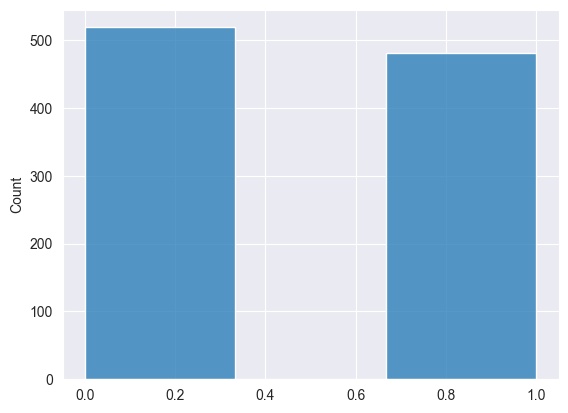

In [19]:
#simulate a game of craps 1000 times 
# 再次模拟 craps 结果（与上一单元略重复）
n_sims = 1000
results = [craps() for _ in range(n_sims)]  # 重新生成结果列表
print(f'Winning percentage over {n_sims} simulations: {win_rate*100}%')  # 注意：这里使用的是上一单元的 win_rate 而不是本行的 results

sns.histplot(results, bins = 3, kde = False)  # 绘制直方图（bins=3 对伯努利数据较多余，保留原始设置）

# **The 68-95-99.7 Rule**

If $\sigma$ is the sample standard deviation of a normal distribution of a repeated simulation with simulated value $E$ with true mean $\mu$, then there is approximately a $68\%$ chance that $|E-\mu|\leq \sigma$, approximately a $95\%$ that $|E-\mu|\leq 2\sigma$, and a $99.7\%$ chance that $|E-\mu|\leq 3\sigma$.

In [20]:
### Simulate the following experiment 1000 times
## Experiment: Take the average of 500 rolls of two dice


#Remark: The average of 500 random experiments approximates a normal distribution by the Central Limit Theorem.

#We therefore expect the 60-95-99.7 rule to apply.

In [22]:
# Slow version: loop-based simulation
# 慢速版本：逐次循环模拟
# 目标：一次实验=掷两颗骰子 n_rolls 次，取和的均值；重复 n_sims 次，研究均值分布
n_sims = 1000
n_rolls = 500
results = []
for _ in range(n_sims):
    rolls = np.random.randint(1,7,(n_rolls,2))  # 形状 (n_rolls, 2)
    sums = np.sum(rolls, axis=1)  # 每次两骰之和，理论期望为 7
    avg = np.mean(sums)
    results.append(avg)  # 收集该实验的均值
# results 为长度 n_sims 的样本均值序列

In [23]:
# Convert list to array and calculate sample standard deviation
# 将列表转为数组并计算样本标准差 (总体/样本差异在此影响很小)
simulated_means = np.array(results)
sigma = np.std(simulated_means, ddof=1)  # 使用无偏估计 ddof=1

In [27]:
# Test 68-95-99.7 empirical rule coverage
# 检验 68-95-99.7 经验法则覆盖率
# 理论均值为 7（两颗独立公平骰子的和的期望：E=3.5+3.5=7）
within_one_std = np.abs(simulated_means - 7) < sigma
within_two_std = np.abs(simulated_means - 7) < 2*sigma
within_three_std = np.abs(simulated_means - 7) < 3*sigma    

print(f'1σ coverage: {np.mean(within_one_std)*100:.2f}% (theory ~68%)')  # 1σ 覆盖率: 理论~68%
print(f'2σ coverage: {np.mean(within_two_std)*100:.2f}% (theory ~95%)')  # 2σ 覆盖率: 理论~95%
print(f'3σ coverage: {np.mean(within_three_std)*100:.2f}% (theory ~99.7%)')  # 3σ 覆盖率: 理论~99.7%

1σ coverage: 67.80% (theory ~68%)
2σ coverage: 95.90% (theory ~95%)
3σ coverage: 99.70% (theory ~99.7%)


In [28]:
# Fast version: fully vectorized
# 快速版本：完全向量化
# 注意：这里原来 n_rolls=50 与前面"500"有差异，可根据需要调一致。这里保留 50 展示更快但方差稍大的情形。

n_experiments = 10000
n_rolls = 50
# Generate shape (n_experiments, n_rolls, 2) integer array representing all dice results for each experiment
# 生成形状 (n_experiments, n_rolls, 2) 的整数数组，表示每次实验所有骰子结果
raw = np.random.randint(1,7,(n_experiments,n_rolls,2))
# Sum last dimension to get two-dice sum for each roll, then take mean over second dimension to get experiment mean
# 先对最后一维求和得到每次 roll 的两骰和，再对第二维取均值得到每个实验的均值
simulated_means = np.mean(np.sum(raw, axis=2), axis=1)
sigma = np.std(simulated_means, ddof=1)

within_one_std = np.abs(simulated_means - 7) < sigma
within_two_std = np.abs(simulated_means - 7) < 2*sigma
within_three_std = np.abs(simulated_means - 7) < 3*sigma

print(f'1σ coverage: {np.mean(within_one_std)*100:.2f}%')  # 1σ 覆盖率
print(f'2σ coverage: {np.mean(within_two_std)*100:.2f}%')  # 2σ 覆盖率
print(f'3σ coverage: {np.mean(within_three_std)*100:.2f}%')  # 3σ 覆盖率

1σ coverage: 69.54%
2σ coverage: 95.48%
3σ coverage: 99.79%


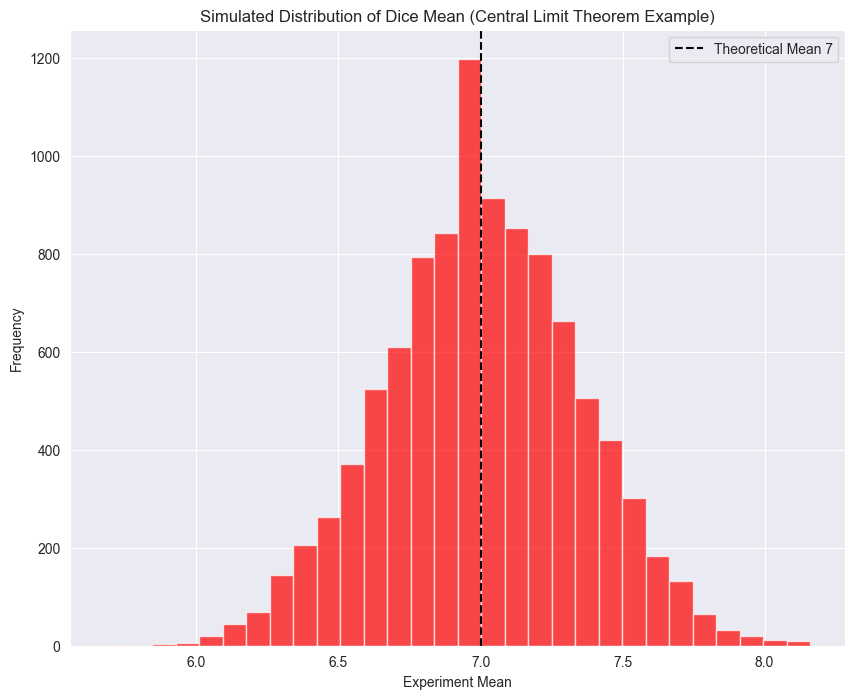

In [34]:
# Visualize sample mean distribution showing approximate normal shape (Central Limit Theorem)
# 可视化样本均值分布，展示近似正态形状（中心极限定理）
plt.figure(figsize = (10,8))
plt.hist(simulated_means, bins = 30, alpha = 0.7, color = 'red')
plt.title('Simulated Distribution of Dice Mean (Central Limit Theorem Example)')  # 两骰均值的模拟分布 (中心极限定理示例)
plt.xlabel('Experiment Mean')  # 实验均值
plt.ylabel('Frequency')  # 频数
plt.axvline(7, color='black', linestyle='--', label='Theoretical Mean 7')  # 理论均值 7
plt.legend()
plt.show()

**Question**: Consider the uniform distribution on the unit interval $[0,1]$. 

What is the expected number of draws needed for the sum to exceed $1$?

In [35]:
def draw_until_one() -> int:
    """Continuously sample from U(0,1) and accumulate until sum >= 1, return number of draws needed.
    持续从 U(0,1) 独立抽样累加，直到总和 ≥ 1 时停止，返回所需抽样次数。
    Classic result: expected number approaches e ≈ 2.71828.
    经典结果：期望次数趋近 e ≈ 2.71828。
    """
    draws = 0
    total_sum = 0.0
    while True:
        draws += 1
        total_sum += np.random.rand()  # U(0,1) sample # U(0,1) 样本
        if total_sum >= 1:
            return draws

In [36]:
# Simulate multiple times to estimate expected number of draws
# 模拟多次以估计期望抽样次数
n_trials = 100_000
samples = [draw_until_one() for _ in range(n_trials)]
mean_est = np.mean(samples)
var_est = np.var(samples, ddof=1)
print(f'Simulated average draws: {mean_est:.5f} (theoretical e = {np.e:.5f})')  # 模拟平均次数: 理论 e =
print(f'Sample variance estimate: {var_est:.5f}')  # 样本方差估计:
# Can add distribution visualization:
# 可增加分布可视化：
# sns.histplot(samples, discrete=True)
# plt.show()

Simulated average draws: 2.71408 (theoretical e = 2.71828)
Sample variance estimate: 0.75956


In [37]:
# (Already merged to previous cell) For quick re-estimation if needed:
# （已合并到前一单元）若需再次快速估计，可调用：
# np.mean([draw_until_one() for _ in range(50_000)])

In [38]:
# Numerical value of e (theoretical expectation)
# e 的数值（理论期望）
np.e

2.718281828459045